In [1]:
# Populating the interactive namespace from numpy, matplotlib, math, pyproj
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import *
import pyproj
geod = pyproj.Geod(ellps="WGS84")

In [3]:
def points_on_line(lon, lat, d, D, lons2, lats2, strike):
    """
    Calculates the coordinates and the strike angles of subfaults with
    length D along the fault.
    As an input receives vectors of coordinates (in degrees) of the fault
    (longitude and latitude, respectfully; sorted by ascending longitude), 
    distance to the first subfault location, the length of the subfault (in meters),
    vectors of the coordinates and the strike angles of the subfaults.
    """
    i = 0
    p1 = lon[0]
    p2 = lat[0]
    n = len(lon) - 2
    
    while True:
        # calculate distance and angles from current position to the next point along the fault
        az1, az2, dist = geod.inv(p1, p2, lon[i + 1], lat[i + 1], radians=False)
        
        # if the distance to the next point is greater than the required distance
        if dist > d:
            
            # calculate coordinates of the point on the fault at the required distance 
            # in the direction of the next point
            p1, p2, backaz = geod.fwd(p1, p2, az1, d, radians=False)
            
            # save the coordinates and the strike angle of the subfault
            lons2.append(p1)
            lats2.append(p2)
            strike.append(az2)
            d = D
            
        # if the distance to the next point is smaller than the required distance    
        else:
            
            # move the current position to the next point and calculate the remaining 
            # distance
            d = d - dist
            i = i + 1 
            p1 = lon[i]
            p2 = lat[i]
            
        if i > n:
            break
            
    return lons2, lats2, strike

In [4]:
def create_subfaults(lon, lat, D, W, nlayers):
    """
    Calculates the coordinates and the strike angles of subfaults with
    length D along the fault and width W perpendicular to the fault.
    As an input receives vectors of coordinates (in degrees) of the fault
    (longitude and latitude, respectfully; sorted by ascending longitude), 
    the length and the width of the subfault (in meters) and the desired 
    number of the subfault layers (in the direction perpendicular to the fault).
    """
    
    lons2 = []
    lats2 = []
    strike = []
    d = D/2

    # Calculate the coordinates and the strike angles of subfaults with
    # length D along the fault line
    [lons2, lats2, strike] = points_on_line(lon, lat, d, D, lons2, lats2, strike)
    
    # when more than one layer are required
    if nlayers > 1:
        
        # find the number of subfaults in the first layer
        len_layer = len(lons2)
        
        # for each layer
        for j in range(2, nlayers + 1):
            
            # for each subfault in the layer
            dummy_lons2 = []
            dummy_lats2 = []
            dummy_strike = []
            
            for i in range(len_layer):
                
                # calculate coordinates of the points at the required distance 
                #from the previous layer perpendicular to the fault
                b = i + len(lons2) - len_layer
                dlons2, dlats2, backaz = geod.fwd(lons2[b], lats2[b], strike[b] + 90, W, radians=False)
                
                # save the coordinates and the strike angle of the points
                dummy_lons2.append(dlons2)
                dummy_lats2.append(dlats2)
                dummy_strike.append(strike[b])
                
            dummy_lons3 = []
            dummy_lats3 = []
            dummy_strike3 = []
            
        
            p1 = dummy_lons2[0]
            p2 = dummy_lats2[0]
            d = D
            dummy_lons3.append(p1)
            dummy_lats3.append(p2)
            dummy_strike3.append(dummy_strike[0])
            
            # Calculate the coordinates and the strike angles of subfaults with
            # length D along the line parallel to the fault line at the distance W from the fault line
            [dummy_lons3, dummy_lats3, dummy_strike3] = points_on_line(dummy_lons2, dummy_lats2, d, D,
                                                                       dummy_lons3, dummy_lats3, dummy_strike3)
            
                    
            lons2.extend(dummy_lons3)
            lats2.extend(dummy_lats3)
            strike.extend(dummy_strike3)
            
            len_layer = len(dummy_lons3)
                
    return lons2, lats2, strike

# Examples

1. Hellenic arc

creating five layers of subfaults, 20 km of length and 20 km of width each.

In [5]:
# input: longitudes of Hellenic arc (approximate)
lon = np.array([19.8686076, 20.00207124, 20.12339917, 20.23262055, 20.34187112, 20.46322822, 20.57242043, 
                20.68161265, 20.80294058, 20.92418099, 21.03331486, 21.17879751, 21.28798973, 21.40925931, 
                21.51842236, 21.6275854, 21.74885498, 21.87015374, 21.99142332, 22.11266373, 22.2459815, 
                22.35505703, 22.47632661, 22.59756702, 22.71886578, 22.85230024, 22.97362817, 23.10709181, 
                23.20417748, 23.32547624, 23.32547624, 23.48312378, 23.61652907, 23.74987602, 23.87111643, 
                24.0044342, 24.14988769, 24.27109892, 24.42862977, 24.57399574, 24.71936171, 24.87686339, 
                25.03436506, 25.20391493, 25.36135827, 25.5188016, 25.65197351, 25.80927098, 25.93021967, 
                26.05113918, 26.18413606, 26.31716211, 26.4622947, 26.58321421, 26.71626944, 26.8614312, 
                27.00662213, 27.13964818, 27.27273258, 27.39368126, 27.51460078, 27.63552029, 27.75641063, 
                27.84095219, 27.90128067, 27.96157998, 28.00977275, 28.04585898, 28.08194521, 28.13013799, 
                28.19046647, 28.26290148, 28.34741387, 28.43195542, 28.51652615, 28.60109688, 28.68566761])

In [6]:
# input: latitudes of Hellenic arc (approximate)
lat = np.array([37.91566265, 37.79518072, 37.68674699, 37.57831325, 37.45783133, 37.3373494, 37.24096386, 
                 37.14457831, 37.03614458, 36.96385542, 36.89156627, 36.80722892, 36.71084337, 36.62650602, 
                 36.54216867, 36.45783133, 36.37349398, 36.27710843, 36.19277108, 36.12048193, 36.06024096, 
                 36.01204819, 35.92771084, 35.85542169, 35.75903614, 35.65060241, 35.54216867, 35.42168675, 
                 35.3253012, 35.22891566, 35.22891566, 35.12048193, 35.02409639, 34.95180723, 34.87951807, 
                 34.81927711, 34.74698795, 34.68674699, 34.62650602, 34.59036145, 34.55421687, 34.5060241, 
                 34.45783133, 34.43373494, 34.40963855, 34.38554217, 34.38554217, 34.42168675, 34.46987952, 
                 34.53012048, 34.60240964, 34.6626506, 34.72289157, 34.78313253, 34.8313253, 34.87951807, 
                 34.91566265, 34.97590361, 35.01204819, 35.06024096, 35.12048193, 35.18072289, 35.25301205, 
                 35.3373494, 35.42168675, 35.51807229, 35.61445783, 35.71084337, 35.80722892, 35.90361446, 
                 35.98795181, 36.07228916, 36.1686747, 36.25301205, 36.3253012, 36.39759036, 36.46987952])

In [7]:
# calculating coordinates and strike angles of subfaults (20 km of length, 20 km of width, 5 layers)
[lons22, lats22, strike22] = create_subfaults(lon, lat, 20000, 20000, 5)

In [8]:
# defining parameters of each subfault (in the example all parameters are uniformely distributed and do not 
# describe a real earthquake, they are used only for plotting the subfaults)
depth = 5*np.ones(len(lons22))
length = 20*np.ones(len(lons22))
width = 20*np.ones(len(lons22))
dip = 15*np.ones(len(lons22))
rake = 90*np.ones(len(lons22))
slip = 10*np.ones(len(lons22))

In [9]:
# writing the subfaults parameters in the csv file suitable for Geoclaw
with open("hellenicarc.csv", "w") as f:
    f.write("Longitude,Latitude,Depth,Length,Width,Strike,Dip,Rake,Slip\n")
    for long, latt, d, l, w, st, dipp, r, sl in zip(lons22, lats22, depth, length, width, strike22, dip, rake, slip):
        f.write("{:.7},{:.7},{},{},{},{:.6},{},{},{}".format(long, latt, d, l, w, st, dipp, r, sl))
        f.write("\n")

In [10]:
# reading the csv file from Geoclaw
from clawpack.geoclaw import dtopotools, fgmax_tools
import os
CLAW = os.environ['CLAW']
subfault_fname = 'hellenicarc.csv'
input_units = {"length":"km", "width":"km", "depth":"km", "slip":"m"}
fault = dtopotools.CSVFault()
fault.read(subfault_fname, input_units=input_units)

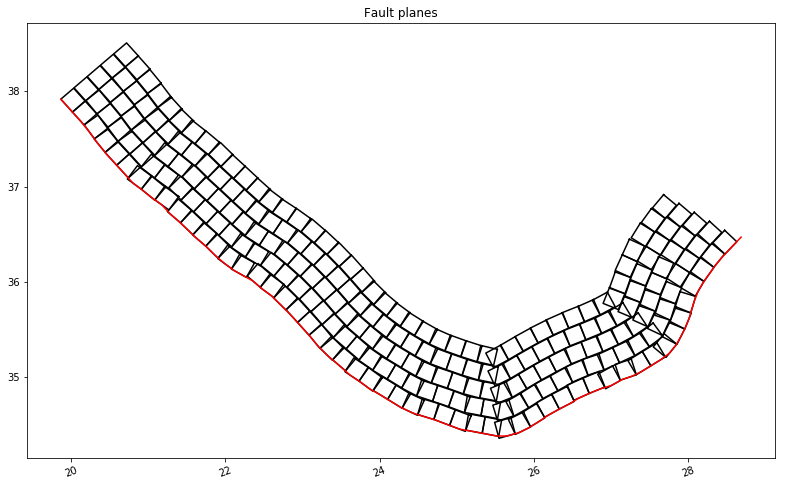

In [11]:
# creating and plotting subfaults in Geoclaw
_, axes = plt.subplots(figsize=(16, 8))
fault.plot_subfaults(axes=axes, plot_rake=False)
plt.plot(lon, lat, 'r')

In [12]:
# reading Geoclaw output
fg = fgmax_tools.FGmaxGrid()
fg.read_input_data("fgmax_grid.txt")
fg.read_output(outdir="_output")

Reading _output/fort.FG1.valuemax ...
Reading _output/fort.FG1.aux1 ...


(array([ 34. ,  34.5,  35. ,  35.5,  36. ,  36.5,  37. ,  37.5,  38. ,
         38.5,  39. ]), <a list of 11 Text yticklabel objects>)

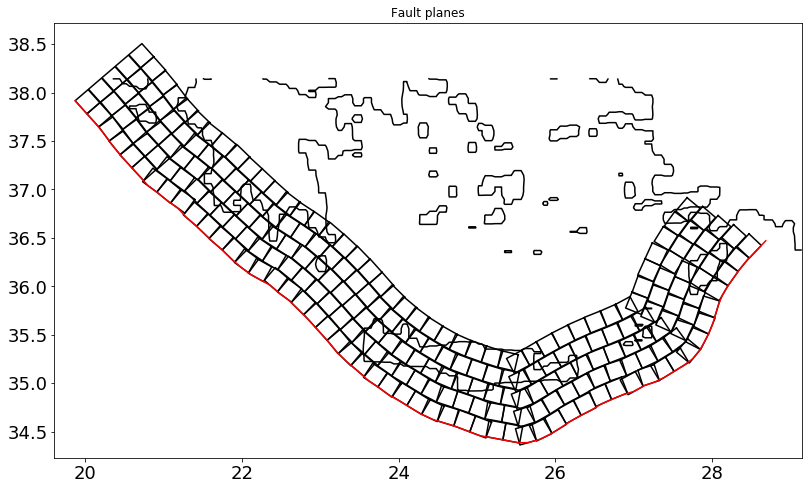

In [13]:
# plotting subfaults together with the coastline (from Geoclaw, 
#it is possible to plot on any other map)

_, axes = plt.subplots(figsize=(16, 8))
fault.plot_subfaults(axes=axes, plot_rake=False)
plt.plot(lon, lat, 'r')
plt.contour(fg.X[590:820, 125:220], fg.Y[590:820, 125:220], fg.B[590:820, 125:220], levels=[0], colors="k")
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)

# 2. Cyprian arc

creating three layers of subfaults, 10 km of length and 10 km of width each.

In [22]:
lon = np.array([32.01659883, 32.12934779, 32.24198274, 32.3550737, 32.43054368, 32.50578565, 32.58114163, 
                32.71310008, 32.86404004, 32.9959985, 33.09022196, 33.20354093, 33.33561339, 33.42972286, 
                33.52360432, 33.61759978, 33.67408826, 33.78729323, 33.8627632, 33.93834718, 34.05189416, 
                34.12770615, 34.18453663, 34.26023462, 34.35468609, 34.48687256, 34.63781251, 34.76977097, 
                34.88320394, 35.01561841, 35.0914304, 35.16712838, 35.22395887, 35.31863835, 35.41343183, 
                35.48935782, 35.54641632, 35.60347481, 35.66064731, 35.71781981, 35.77510631, 35.83262081,
                35.87103982, 35.89047733, 35.90991484, 35.92958036])

In [23]:
lat = np.array([34.33724364, 34.27648004, 34.20061106, 34.18516365, 34.18493565, 34.15449685, 
                34.13916345, 34.12365904, 34.12320303, 34.10769862, 34.09230822, 34.10707161, 
                34.10667259, 34.0761768, 34.01547021, 33.96986901, 33.95459261, 33.9542506, 
                33.9540226, 33.96889999, 34.01387416, 34.05896234, 34.08900213, 34.11898492, 
                34.13380531, 34.14851169, 34.14805568, 34.13255127, 34.16242006, 34.20733723, 
                34.25242541, 34.2824082, 34.31244799, 34.35747917, 34.41761574, 34.47780932, 
                34.5380599, 34.59831048, 34.67366645, 34.74902242, 34.83948379, 34.96015596, 
                35.05067433, 35.1261443, 35.20161428, 35.30729505])

In [39]:
[lons2, lats2, strike] = create_subfaults(lon, lat, 10000, 10000, 3)

In [40]:
depth = 5*np.ones(len(lons2))
length = 10*np.ones(len(lons2))
width = 10*np.ones(len(lons2))
dip = 15*np.ones(len(lons2))
rake = 90*np.ones(len(lons2))
slip = 10*np.ones(len(lons2))

In [41]:
# writing the subfaults parameters in the csv file suitable for Geoclaw
with open("cyprianarc.csv", "w") as f:
    f.write("Longitude,Latitude,Depth,Length,Width,Strike,Dip,Rake,Slip\n")
    for long, latt, d, l, w, st, dipp, r, sl in zip(lons2, lats2, depth, length, width, strike, dip, rake, slip):
        f.write("{:.7},{:.7},{},{},{},{:.6},{},{},{}".format(long, latt, d, l, w, st, dipp, r, sl))
        f.write("\n")

In [42]:
subfault_fname = 'cyprianarc.csv'
input_units = {"length":"km", "width":"km", "depth":"km", "slip":"m"}
fault = dtopotools.CSVFault()
fault.read(subfault_fname, input_units=input_units)

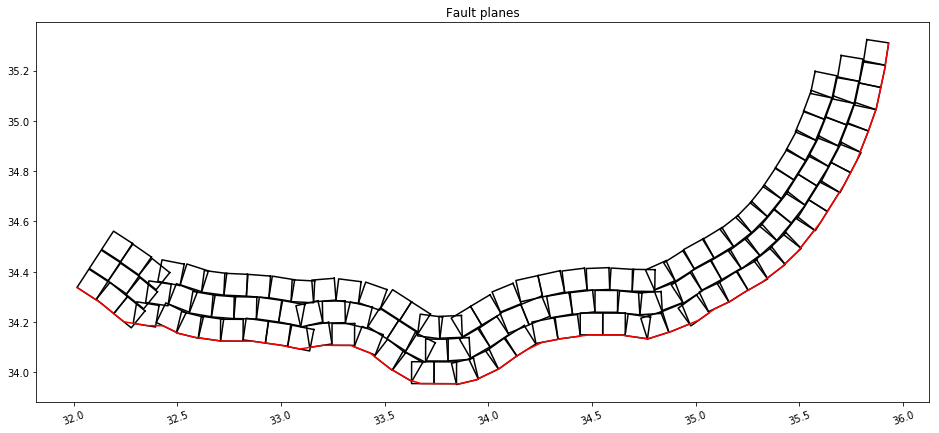

In [43]:
# creating and plotting subfaults in Geoclaw
_, axes = plt.subplots(figsize=(16, 8))
fault.plot_subfaults(axes=axes, plot_rake=False)
plt.plot(lon, lat, 'r')